Частоты признаков:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


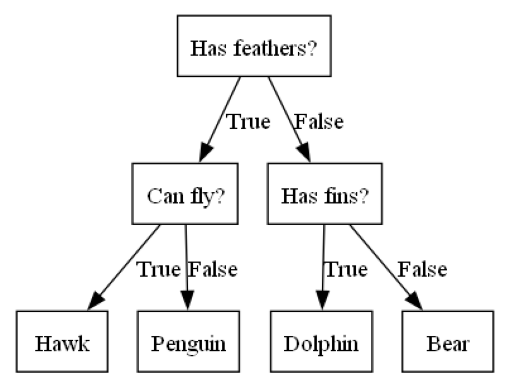

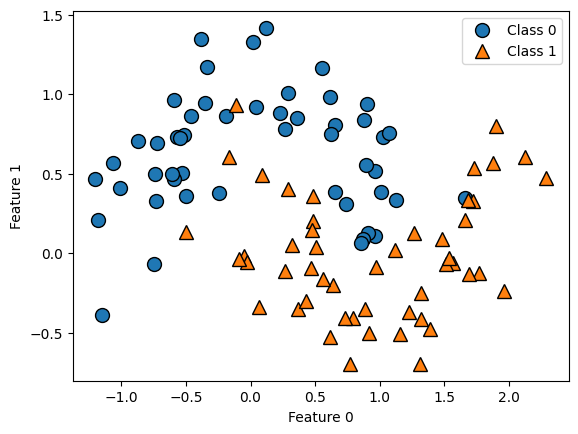

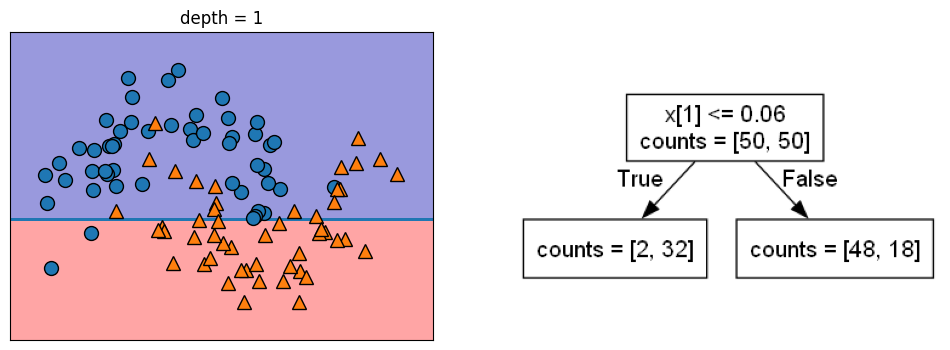

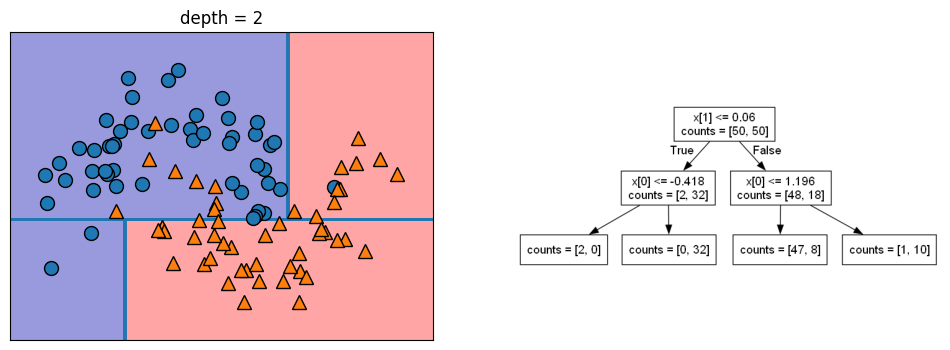

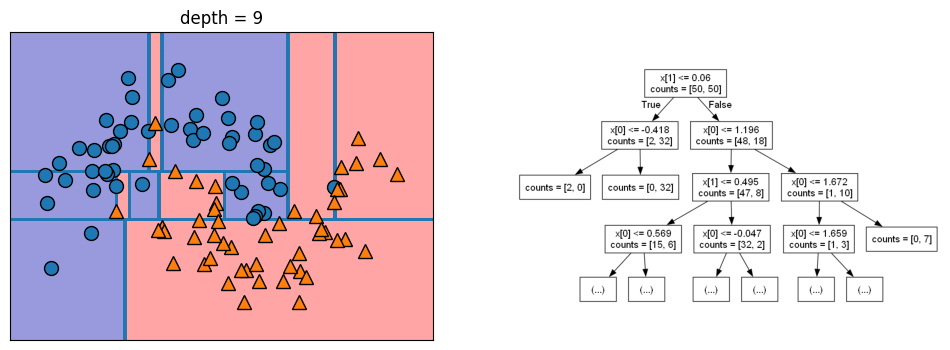

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937
Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951
Важности признаков:
[0.00752597 0.01204155 0.         0.         0.02107272 0.
 0.         0.         0.         0.         0.01644707 0.04630969
 0.         0.00231135 0.00238745 0.         0.         0.
 0.         0.         0.69546322 0.04179055 0.         0.
 0.         0.         0.01740312 0.12587473 0.01137258 0.        ]


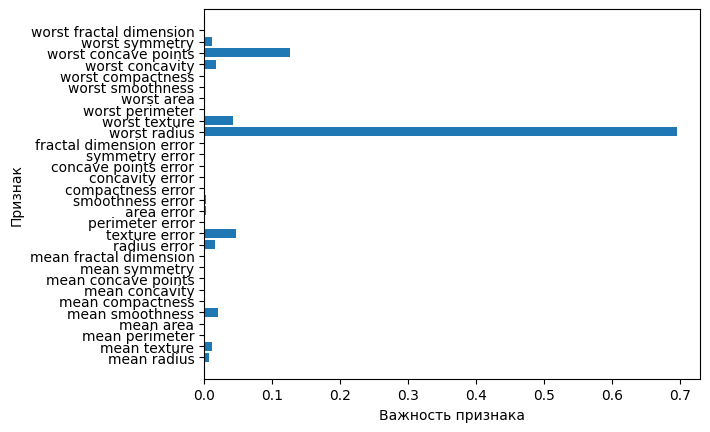

Feature importances: [0. 1.]


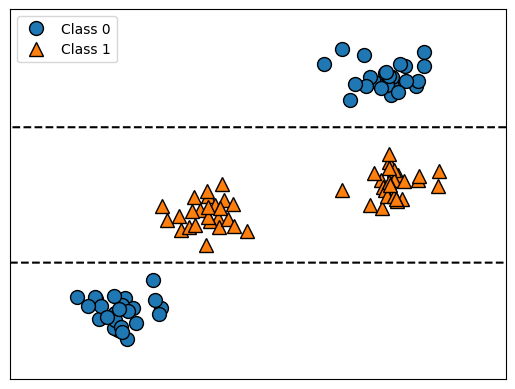

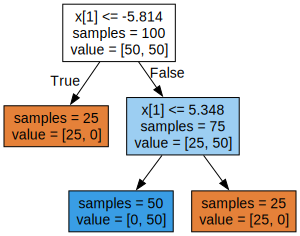

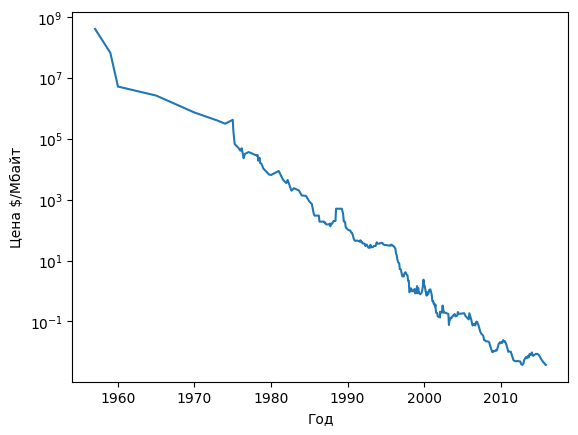

X:
[[1957.  ]
 [1959.  ]
 [1960.  ]
 [1965.  ]
 [1970.  ]
 [1973.  ]
 [1974.  ]
 [1975.  ]
 [1975.08]
 [1975.25]
 [1975.75]
 [1976.  ]
 [1976.17]
 [1976.42]
 [1976.58]
 [1977.08]
 [1978.17]
 [1978.25]
 [1978.33]
 [1978.5 ]
 [1978.58]
 [1978.75]
 [1979.  ]
 [1979.75]
 [1980.  ]
 [1981.  ]
 [1981.58]
 [1982.  ]
 [1982.17]
 [1982.67]
 [1983.  ]
 [1983.67]
 [1984.  ]
 [1984.58]
 [1985.  ]
 [1985.33]
 [1985.42]
 [1985.5 ]
 [1985.58]
 [1985.67]
 [1985.83]
 [1985.92]
 [1986.  ]
 [1986.08]
 [1986.17]
 [1986.25]
 [1986.33]
 [1986.42]
 [1986.5 ]
 [1986.58]
 [1986.67]
 [1986.75]
 [1986.92]
 [1987.  ]
 [1987.08]
 [1987.17]
 [1987.25]
 [1987.33]
 [1987.42]
 [1987.5 ]
 [1987.58]
 [1987.67]
 [1987.75]
 [1987.83]
 [1987.92]
 [1988.  ]
 [1988.08]
 [1988.17]
 [1988.33]
 [1988.42]
 [1988.5 ]
 [1988.58]
 [1988.67]
 [1988.75]
 [1988.83]
 [1988.92]
 [1989.  ]
 [1989.08]
 [1989.17]
 [1989.25]
 [1989.42]
 [1989.5 ]
 [1989.58]
 [1989.67]
 [1989.75]
 [1989.83]
 [1989.92]
 [1990.  ]
 [1990.17]
 [1990.33]
 [1990.

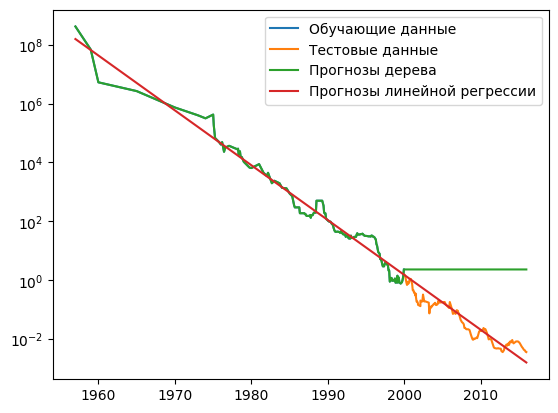

In [2]:
import mglearn 
import sklearn 
import matplotlib.pyplot as plt 
import numpy as np 
 
X = np.array([[0, 1, 0, 1], [1, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 0]]) 
 
y = np.array([0, 1, 0, 1]) 
 
counts = {} 
for label in np.unique(y): 
    counts[label] = X[y == label].sum(axis=0) 
print("Частоты признаков:\n{}".format(counts)) 
 
mglearn.plots.plot_animal_tree() 
plt.show() 
 
mglearn.plots.plot_tree_progressive() 
plt.show() 
 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
 
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split( 
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train) 
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test))) 
 
tree = DecisionTreeClassifier(max_depth=4, random_state=0) 
tree.fit(X_train, y_train) 
 
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test))) 
 
from sklearn.tree import export_graphviz 
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
    feature_names=cancer.feature_names, impurity=False, filled=True) 
 
import graphviz 
with open("tree.dot") as f: 
 
 
    dot_graph = f.read() 
graphviz.Source(dot_graph) 
 
"Export as pdf" 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_breast_cancer 
from sklearn import tree 
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split( 
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=0) 
clf = clf.fit(X_train, y_train) 
 
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("cancer.pdf") 
 
"Create tree with using IPython" 
from IPython.display import Image 
dot_data = tree.export_graphviz(clf, out_file=None, 
    feature_names=cancer.feature_names, 
    class_names=cancer.target_names, 
    filled=True, rounded=True, 
    special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png()) 
 
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier().fit(X_train, y_train) 
print("Важности признаков:\n{}".format(tree.feature_importances_)) 
 
def plot_feature_cancer(model): 
    n_features = cancer.data.shape[1] 
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Важность признака") 
    plt.ylabel("Признак") 
    plt.show() 
 
plot_feature_cancer(tree) 
 
tree = mglearn.plots.plot_tree_not_monotone() 
plt.show() 
from IPython.display import display 
 
 
display(tree) 
 
import pandas as pd 
ram_prices = pd.read_csv("ram_price.csv")  
 
plt.semilogy(ram_prices.date, ram_prices.price) 
plt.xlabel("Год") 
plt.ylabel("Цена $/Мбайт") 
plt.show() 
 
from sklearn.tree import DecisionTreeRegressor 
data_train = ram_prices[ram_prices.date < 2000] 
data_test = ram_prices[ram_prices.date >= 2000] 
y_train = np.log(data_train.price) 
X_train = data_train.date.to_numpy()[:, np.newaxis] 
 
print("X:\n{}".format(X_train)) 
print("y:\n{}".format(y_train)) 
 
tree = DecisionTreeRegressor().fit(X_train, y_train) 
from sklearn.linear_model import LinearRegression 
linear_reg = LinearRegression().fit(X_train, y_train) 
 
X_all = ram_prices.date.to_numpy()[:, np.newaxis] 
 
pred_tree = tree.predict(X_all) 
pred_lr = linear_reg.predict(X_all) 
 
price_tree = np.exp(pred_tree) 
price_lr = np.exp(pred_lr) 
 
plt.semilogy(data_train.date, data_train.price, label="Обучающие данные") 
plt.semilogy(data_test.date, data_test.price, label="Тестовые данные") 
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева") 
plt.semilogy(ram_prices.date, price_lr, label="Прогнозы линейной регрессии") 
plt.legend() 
plt.show() 
 